In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('..')


# EDA & Stats

### Data Understanding

#### Load the data

In [2]:

insurance_data = pd.read_csv('docs/MachineLearningRating_v3.txt',delimiter='|')



/tmp/ipykernel_4641/608296813.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance_data = pd.read_csv('docs/MachineLearningRating_v3.txt',delimiter='|')


In [3]:
insurance_data.head(10)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
5,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
6,145247,12827,2015-04-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0
7,145247,12827,2015-06-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,35.332316,0.0
8,145247,12827,2015-08-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
9,145245,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.009474,0.0


#### Number of rows and columns

In [4]:
num_rows, num_columns = insurance_data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 1000098
Number of columns: 52


#### Find missing value and data types of each columns

In [5]:
def find_missing_values(df):
    """
    Finds missing values and returns a summary.

    Args:
        df: The DataFrame to check for missing values.

    Returns:
        A summary of missing values, including the number of missing values per column.
    """

    null_counts = df.isnull().sum()
    missing_value = null_counts
    percent_of_missing_value = 100 * null_counts / len(df)
    data_type=df.dtypes

    missing_data_summary = pd.concat([missing_value, percent_of_missing_value,data_type], axis=1)
    missing_data_summary_table = missing_data_summary.rename(columns={0:"Missing values", 1:"Percent of Total Values",2:"DataType" })
    missing_data_summary_table = missing_data_summary_table[missing_data_summary_table.iloc[:, 1] != 0].sort_values('Percent of Total Values', ascending=False).round(1)

    print(f"From {df.shape[1]} columns selected, there are {missing_data_summary_table.shape[0]} columns with missing values.")

    return missing_data_summary_table


In [6]:
find_missing_values(insurance_data)


From 52 columns selected, there are 22 columns with missing values.


,Missing values,Percent of Total Values,DataType
NumberOfVehiclesInFleet,1000098,100.0,float64
CrossBorder,999400,99.9,object
CustomValueEstimate,779642,78.0,float64
WrittenOff,641901,64.2,object
Converted,641901,64.2,object
Rebuilt,641901,64.2,object
NewVehicle,153295,15.3,object
Bank,145961,14.6,object
AccountType,40232,4.0,object
Gender,9536,1.0,object


### Find outliers 

In [7]:
def get_outlier_summary(data):
    """
    Calculates outlier summary statistics for a DataFrame.

    Args:
        data : Input DataFrame.

    Returns:
        Outlier summary DataFrame.
    """

    outlier_summary = pd.DataFrame(columns=['Variable', 'Number of Outliers'])
    data = data.select_dtypes(include='number')

    for column_name in data.columns:
        q1 = data[column_name].quantile(0.25)
        q3 = data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

        outlier_summary = pd.concat(
            [outlier_summary, pd.DataFrame({'Variable': [column_name], 'Number of Outliers': [outliers.shape[0]]})],
            ignore_index=True
        )
    non_zero_count = (outlier_summary['Number of Outliers'] > 0).sum()
    print(f"From {data.shape[1]} selected numerical columns, there are {non_zero_count} columns with outlier values.")

    return outlier_summary


#### Replace missing values

In [8]:
def replace_missing_values(data):
  """
  Replaces missing values in a DataFrame with the mean for numeric columns and the mode for categorical columns.

  Args:
    data: The input DataFrame.

  Returns:
    The DataFrame with missing values replaced.
  """

  # Identify numeric and categorical columns
  numeric_columns = data.select_dtypes(include='number').columns
  categorical_columns = data.select_dtypes(include='object').columns

  # Replace missing values in numeric columns with the mean
  for column in numeric_columns:
    column_mean = data[column].mean()
    data[column] = data[column].fillna(column_mean)

  # Replace missing values in categorical columns with the mode
  for column in categorical_columns:
    column_mode = data[column].mode().iloc[0]
    data[column] = data[column].fillna(column_mode)

  return data


In [9]:
insurance_data=replace_missing_values(insurance_data)


In [10]:
find_missing_values(insurance_data)


From 52 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
NumberOfVehiclesInFleet,1000098,100.0,float64


In [11]:
insurance_data = insurance_data.drop(columns='NumberOfVehiclesInFleet')


In [12]:
get_outlier_summary(insurance_data)


From 14 selected numerical columns, there are 14 columns with outlier values.


,Variable,Number of Outliers
0,UnderwrittenCoverID,5717
1,PolicyID,31232
2,PostalCode,8149
3,mmcode,242064
4,RegistrationYear,7482
5,Cylinders,34814
6,cubiccapacity,56939
7,kilowatts,2175
8,NumberOfDoors,107260
9,CustomValueEstimate,220456


#### Remove outliers

In [13]:
def remove_outliers_winsorization(xdr_data):
    """
    Removes outliers from specified columns of a DataFrame using winsorization.

    Args:
        data: The input DataFrame.
        column_names (list): A list of column names to process.

    Returns:
        The DataFrame with outliers removed.
    """
    # data = xdr_data.select_dtypes(include='number')
    for column_name in xdr_data.select_dtypes(include='number').columns:
        q1 = xdr_data[column_name].quantile(0.25)
        q3 = xdr_data[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        xdr_data[column_name] = xdr_data[column_name].clip(lower_bound, upper_bound)

    return xdr_data


In [14]:
remove_outliers_winsorization(insurance_data)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249.0,12827.0,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249.0,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249.0,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255.0,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0
4,145255.0,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520.0,389.0,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,54.824561,0.0
1000094,31520.0,389.0,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,54.824561,0.0
1000095,31520.0,389.0,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,54.824561,0.0
1000096,31519.0,389.0,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [15]:
get_outlier_summary(insurance_data)


From 14 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,UnderwrittenCoverID,0
1,PolicyID,0
2,PostalCode,0
3,mmcode,0
4,RegistrationYear,0
5,Cylinders,0
6,cubiccapacity,0
7,kilowatts,0
8,NumberOfDoors,0
9,CustomValueEstimate,0


#### Summary statistics

In [16]:
insurance_data.describe()


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1000098.0,1.000098e+06,1.000098e+06,1000098.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1000098.0
mean,1.047113e+05,7.928715e+03,3.017795e+03,6.005746e+07,2.010243e+03,4.0,2.472585e+03,9.712713e+01,4.0,2.255311e+05,1.476228e+05,6.323744e+01,1.486439e+01,0.0
std,6.300034e+04,5.217449e+03,2.643016e+03,1.590688e+03,3.198562e+00,0.0,3.289322e+02,1.886670e+01,0.0,4.656615e-10,2.250420e+05,8.309972e+01,2.196933e+01,0.0
min,1.000000e+00,1.400000e+01,1.000000e+00,6.005469e+07,2.000500e+03,4.0,1.551500e+03,2.100000e+01,4.0,2.255311e+05,1.000000e-02,0.000000e+00,-3.289474e+01,0.0
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.0,2.237000e+03,7.500000e+01,4.0,2.255311e+05,5.000000e+03,3.224800e+00,0.000000e+00,0.0
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.0,2.694000e+03,1.110000e+02,4.0,2.255311e+05,7.500000e+03,8.436900e+00,2.178333e+00,0.0
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.0,2.694000e+03,1.110000e+02,4.0,2.255311e+05,2.500000e+05,9.000000e+01,2.192982e+01,0.0
max,2.652605e+05,2.094250e+04,9.209500e+03,6.006066e+07,2.015000e+03,4.0,3.379500e+03,1.650000e+02,4.0,2.255311e+05,6.175000e+05,2.201628e+02,5.482456e+01,0.0


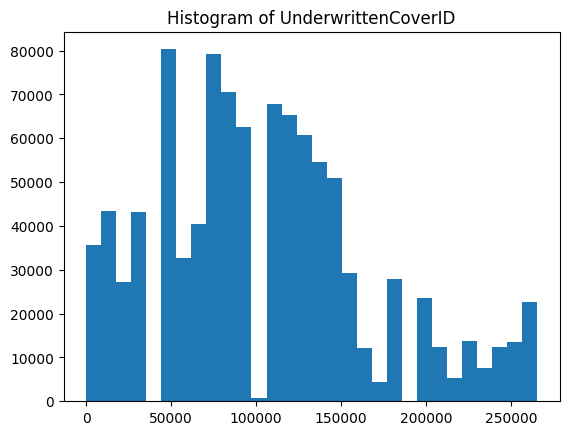

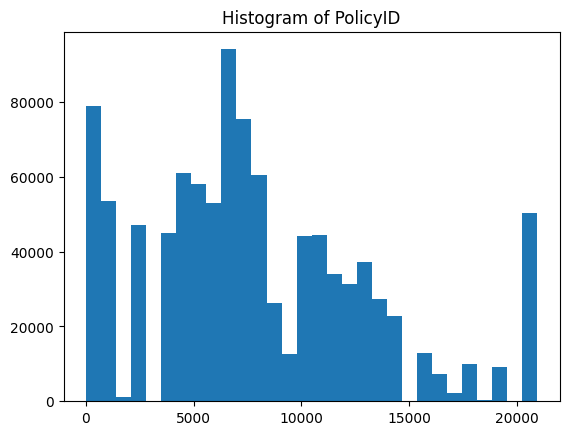

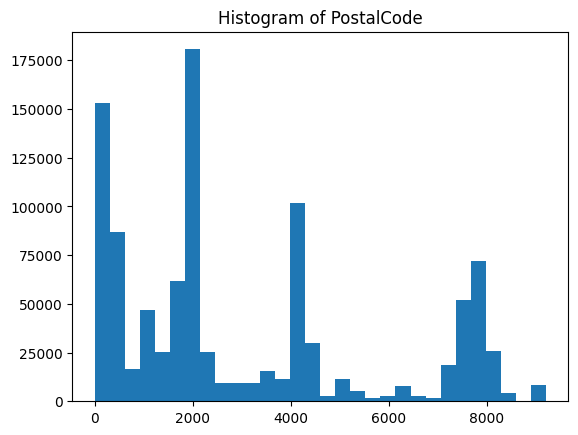

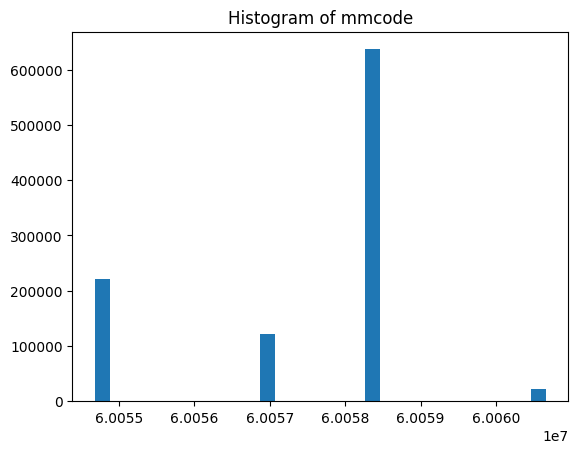

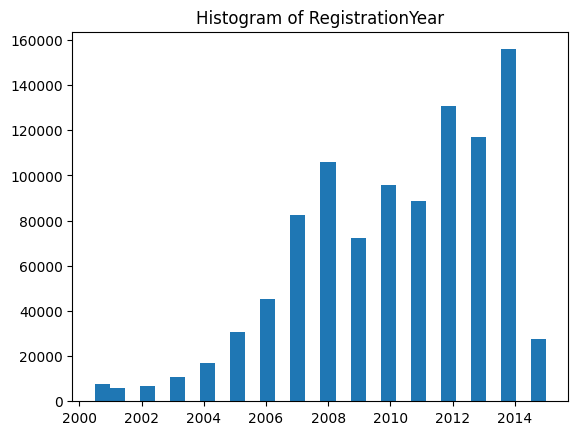

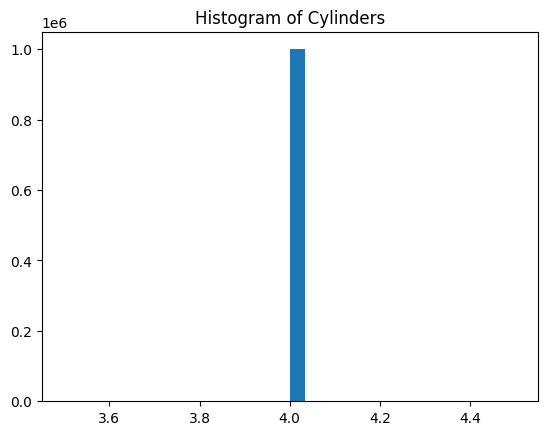

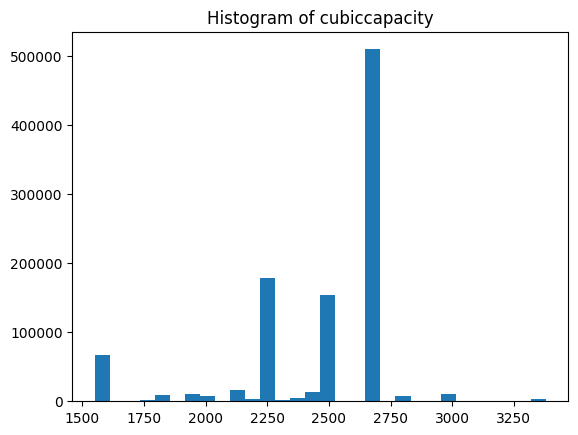

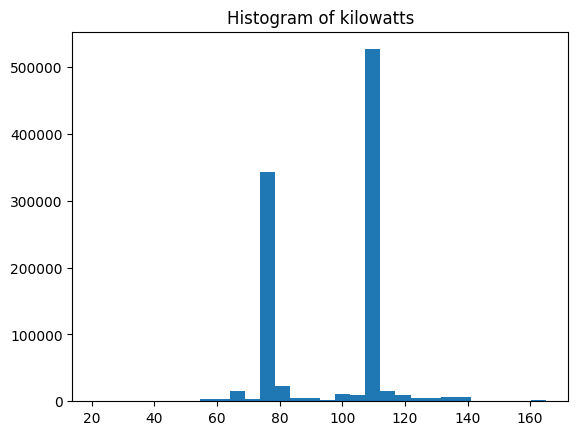

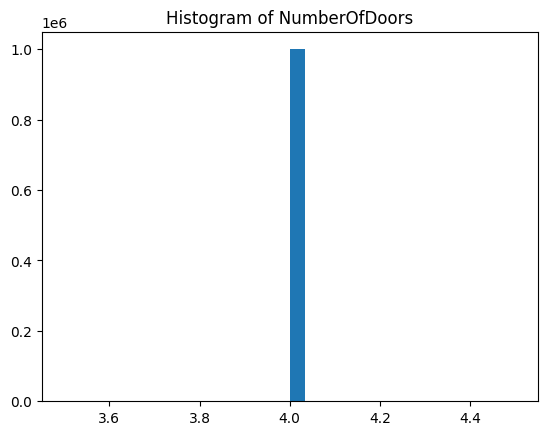

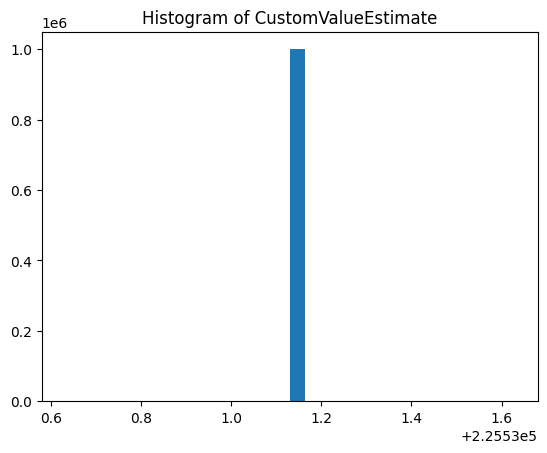

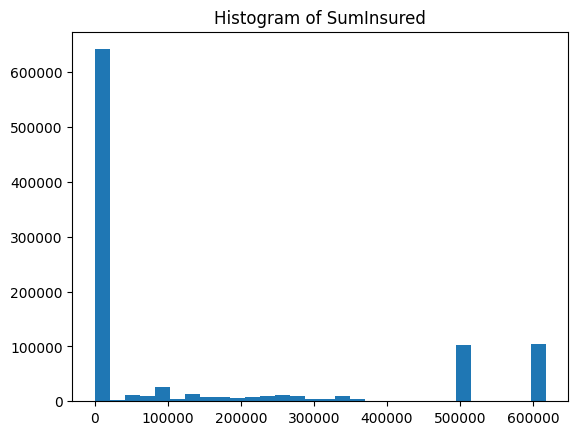

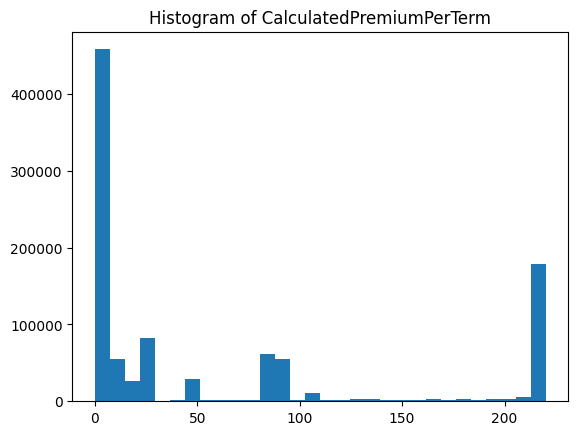

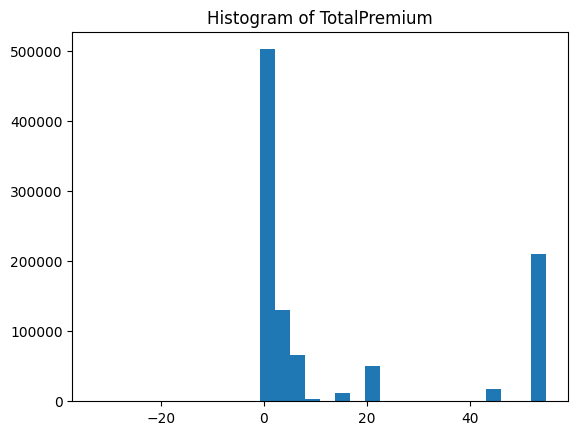

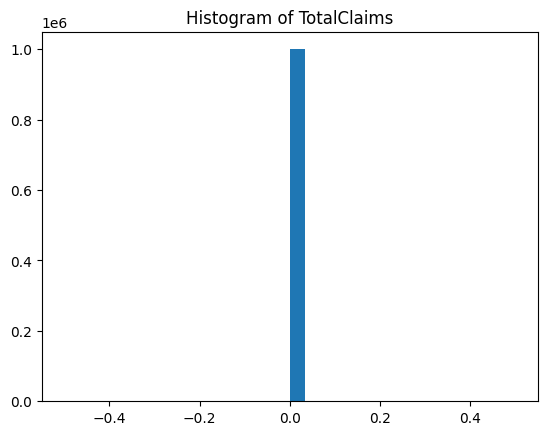

In [17]:
for column in insurance_data.select_dtypes(include='number').columns:
        plt.hist(insurance_data[column], bins=30)
        plt.title(f"Histogram of {column}")
        plt.show()


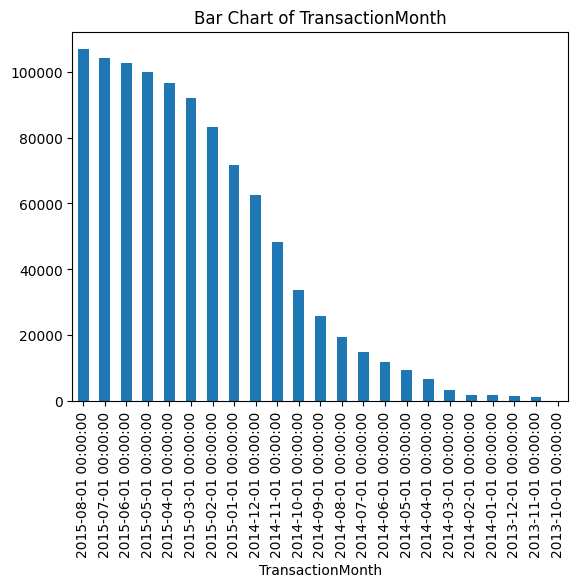

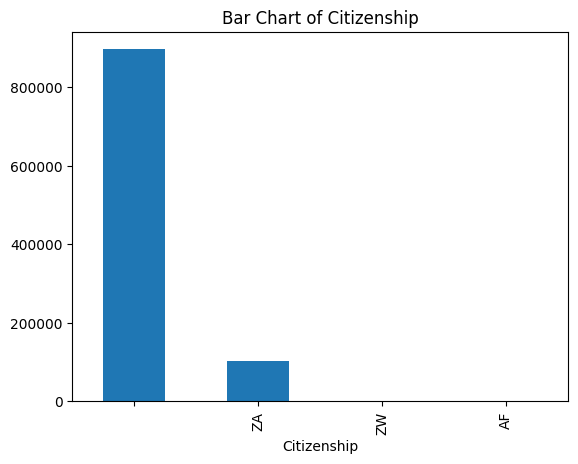

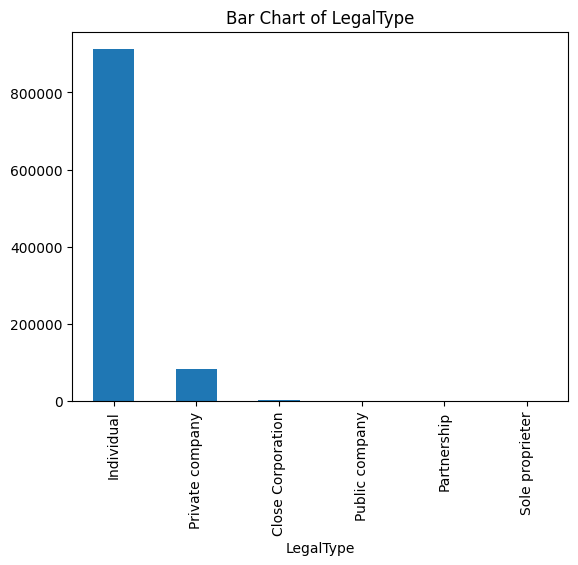

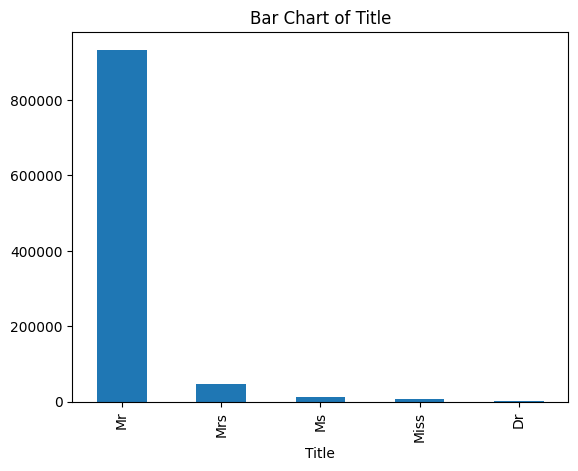

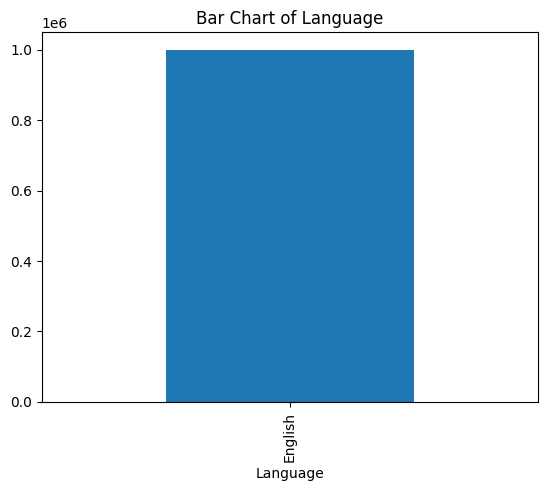

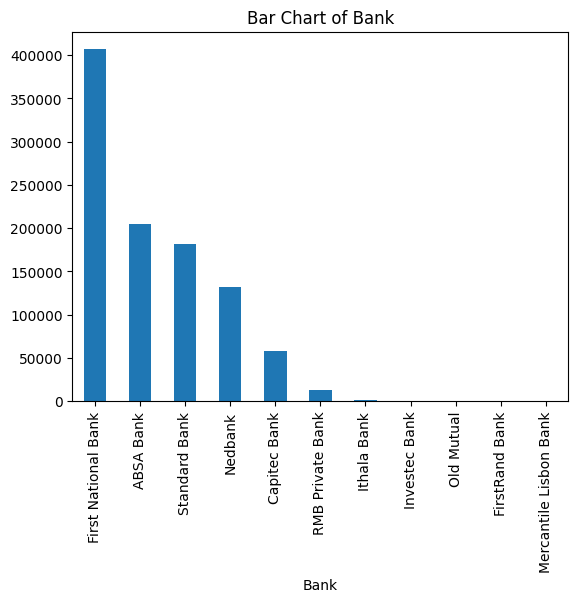

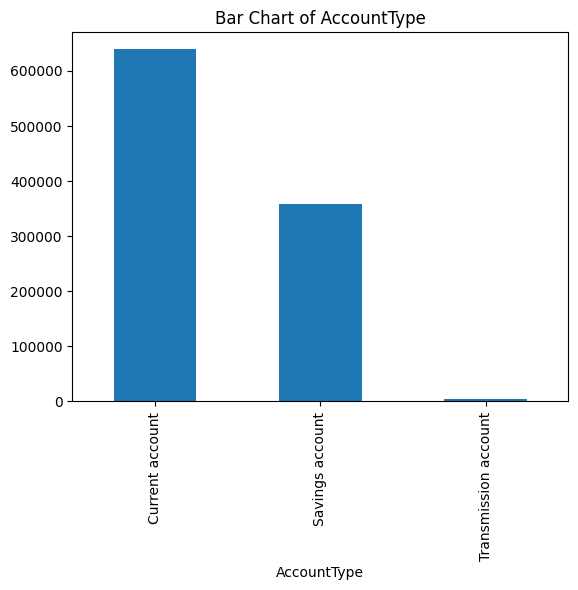

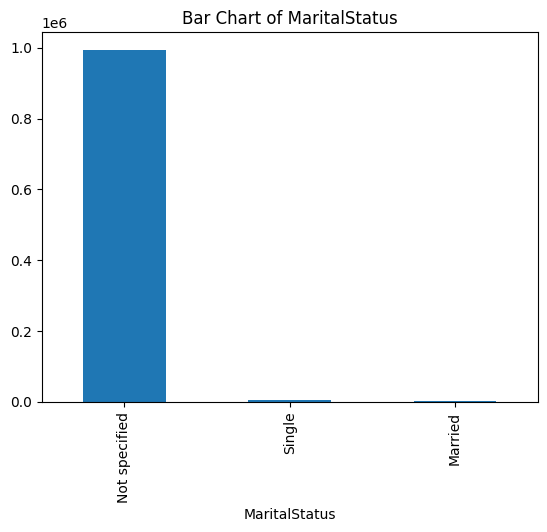

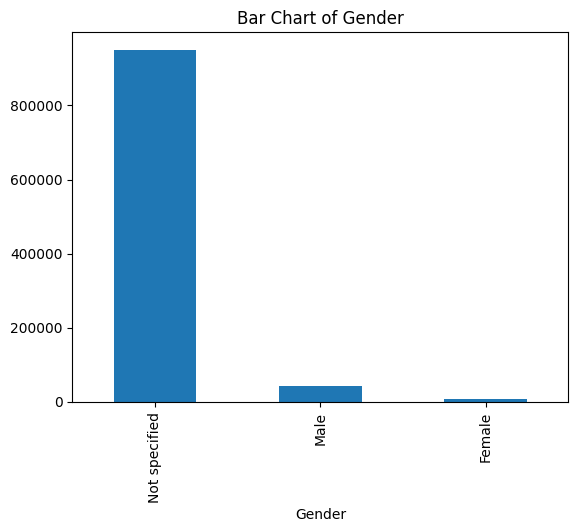

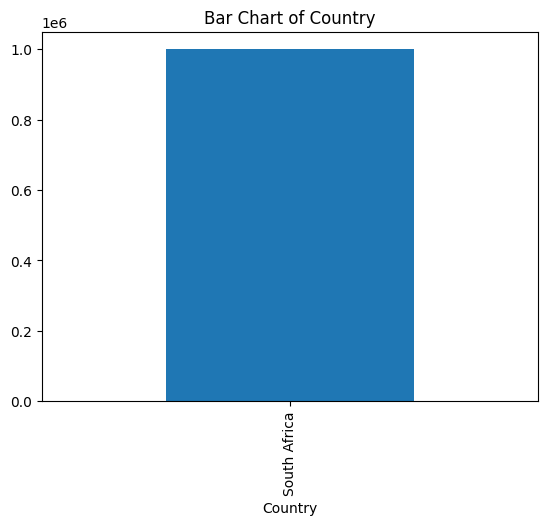

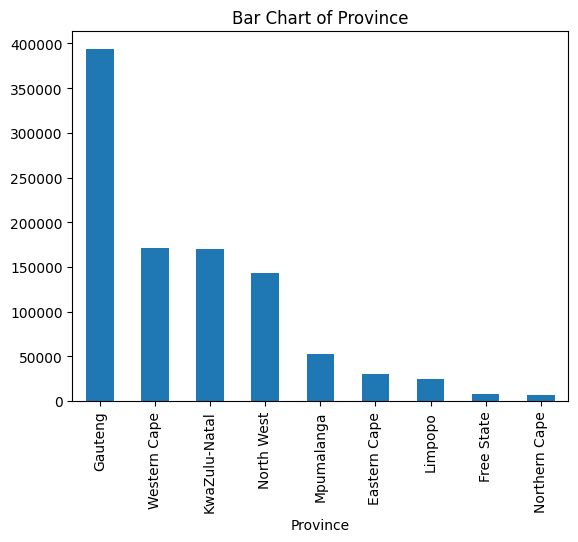

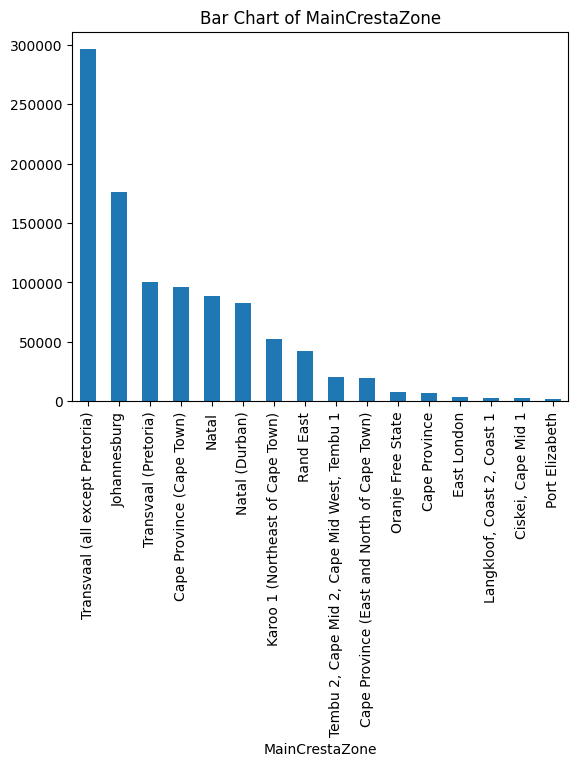

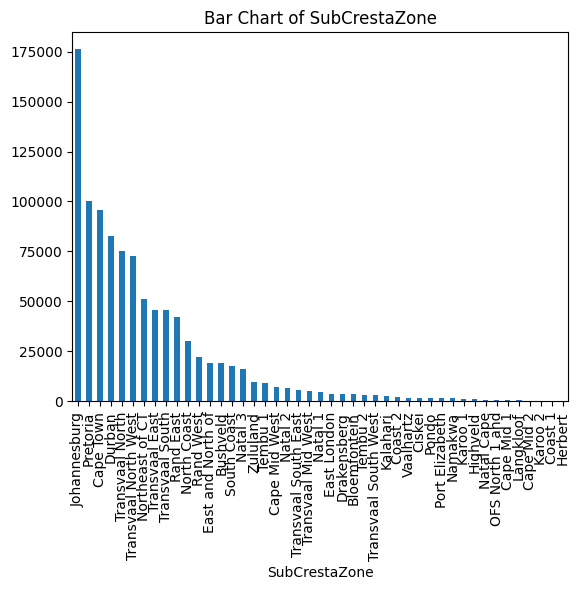

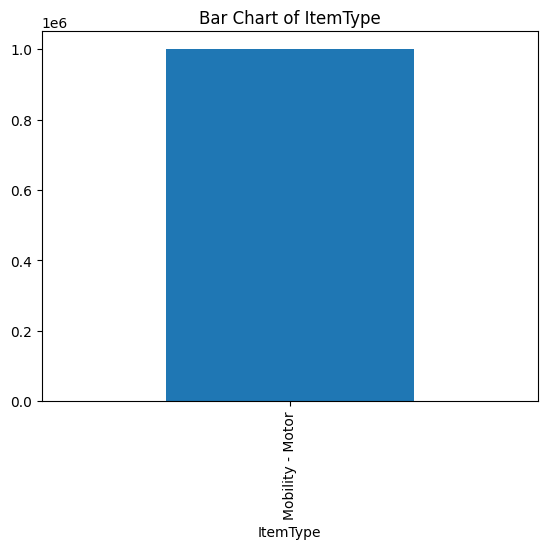

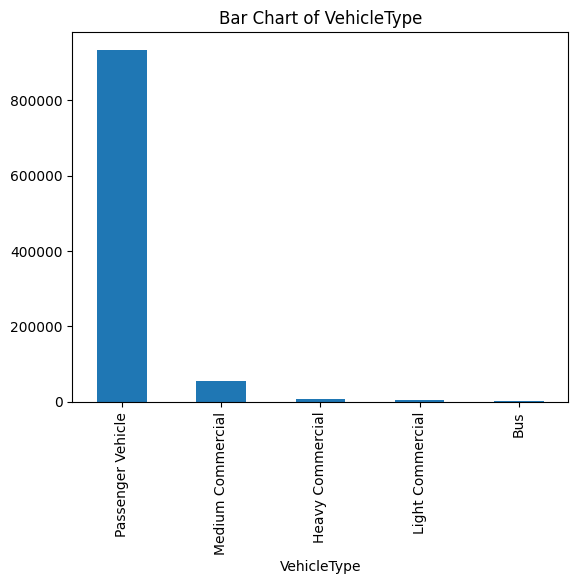

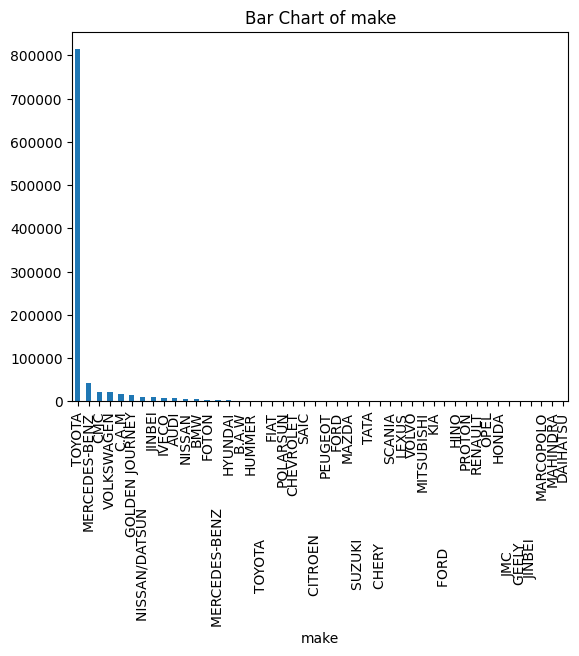

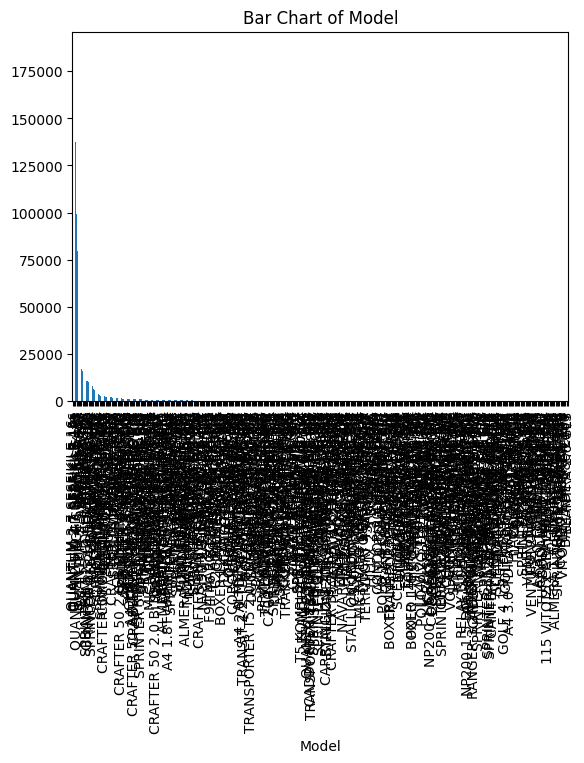

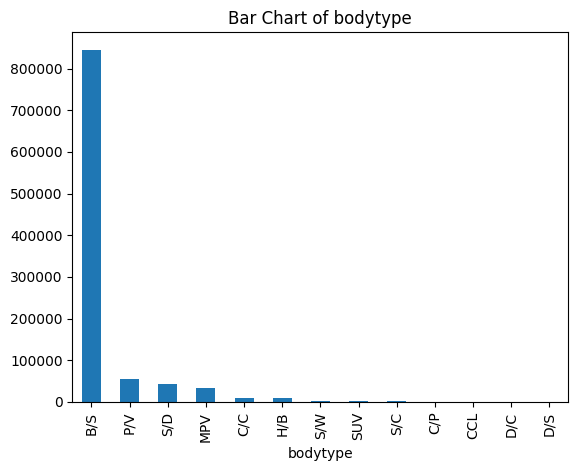

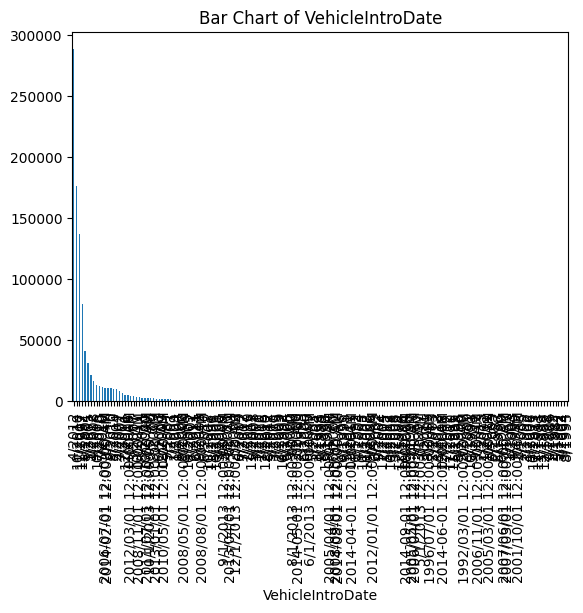

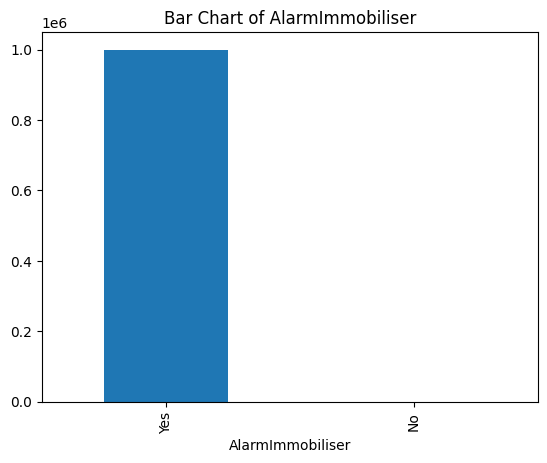

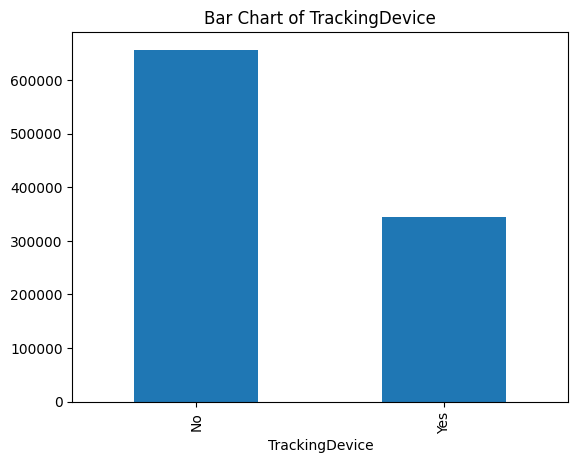

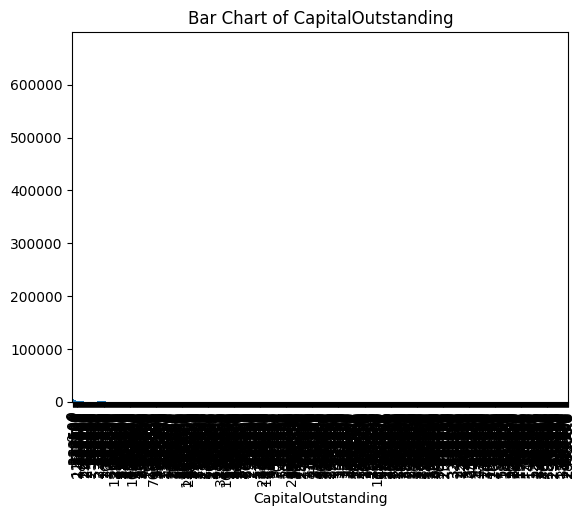

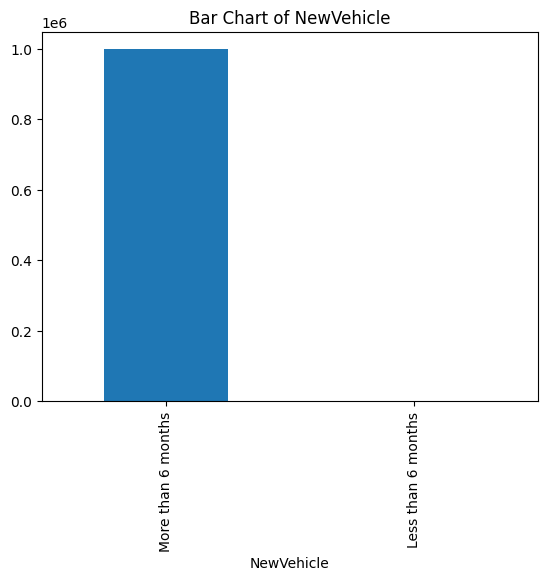

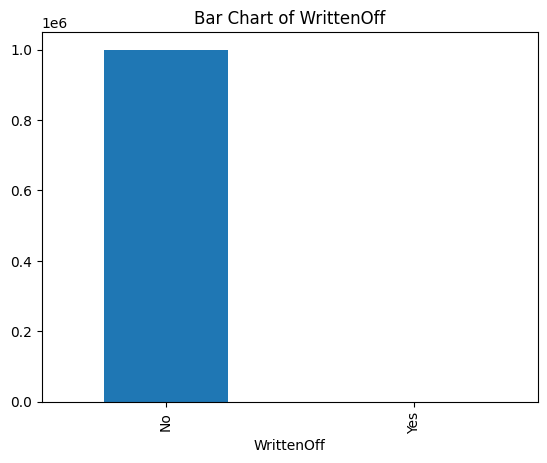

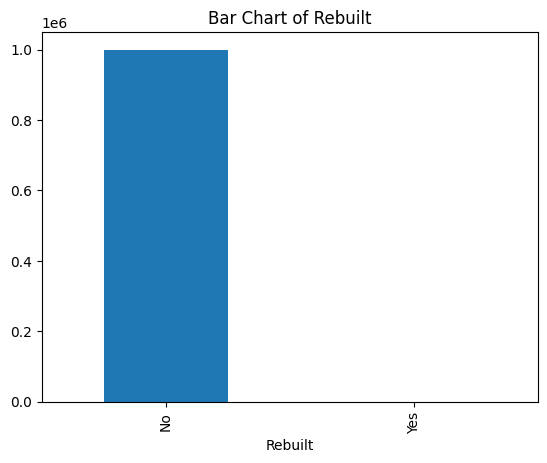

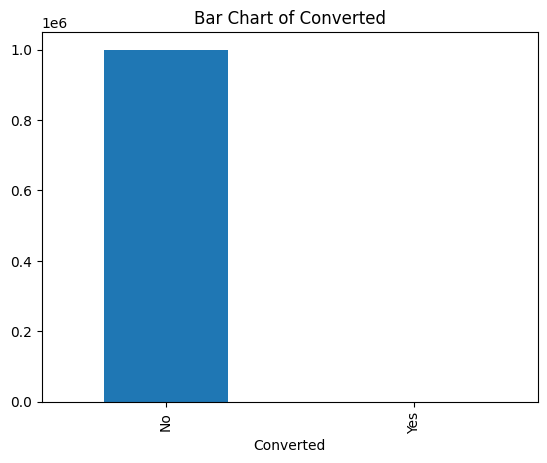

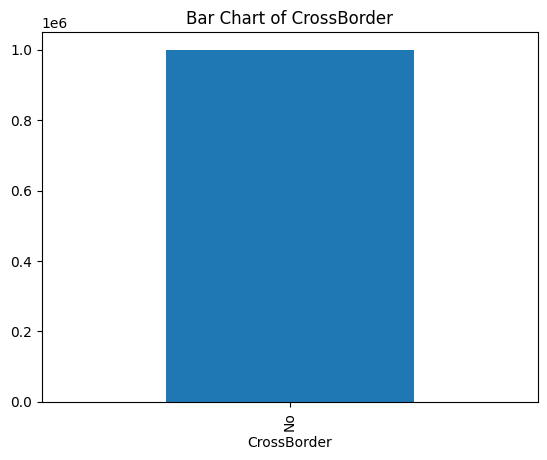

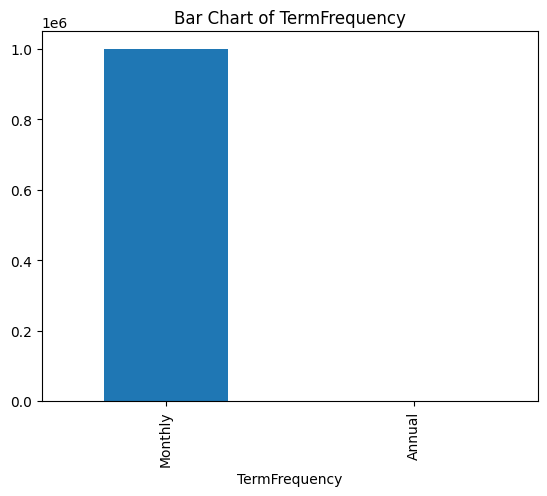

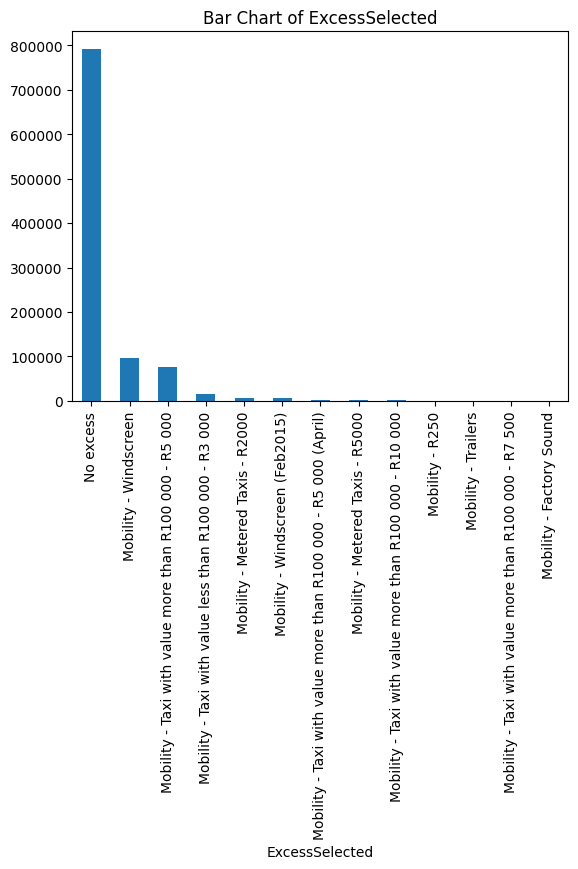

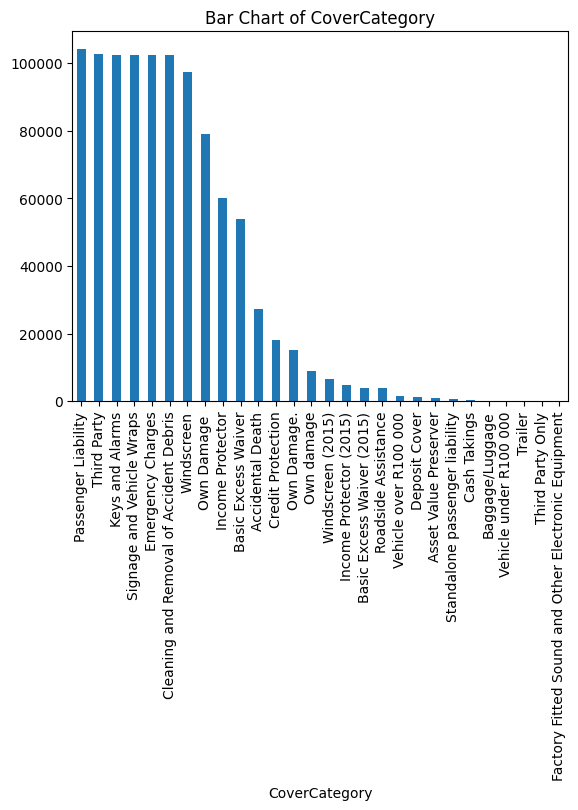

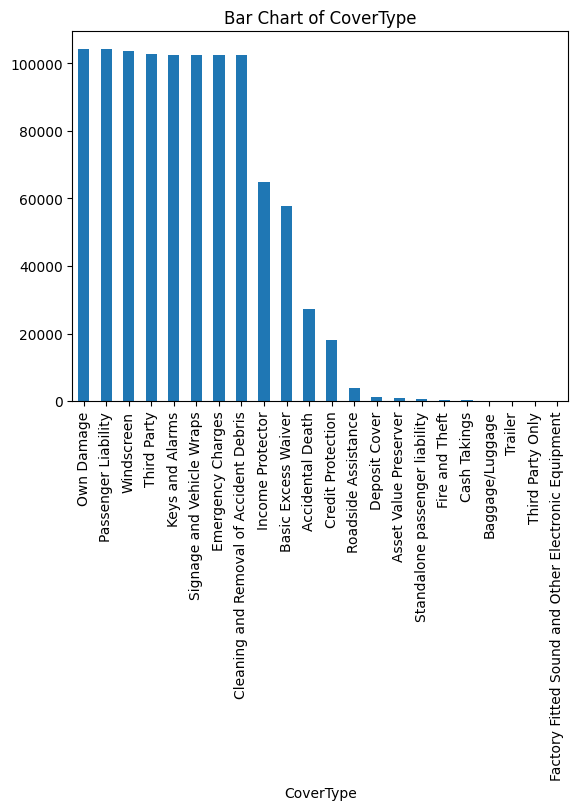

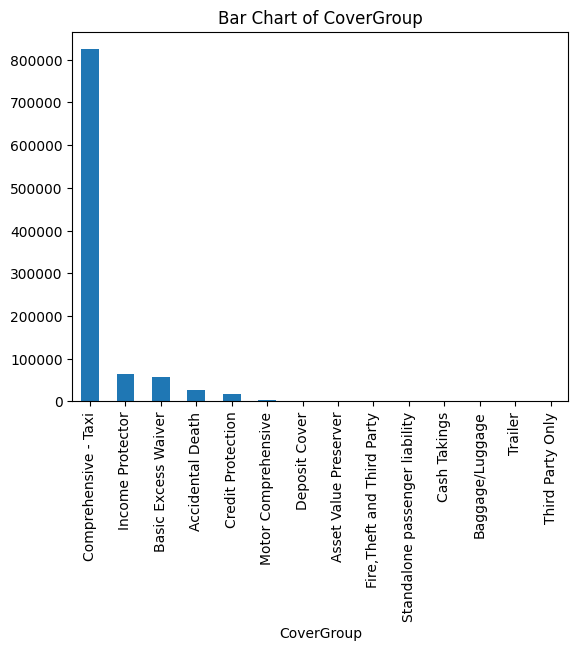

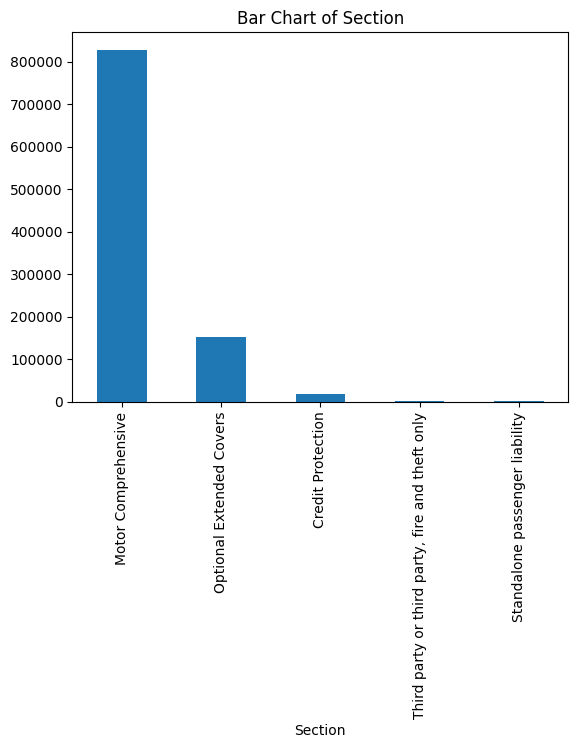

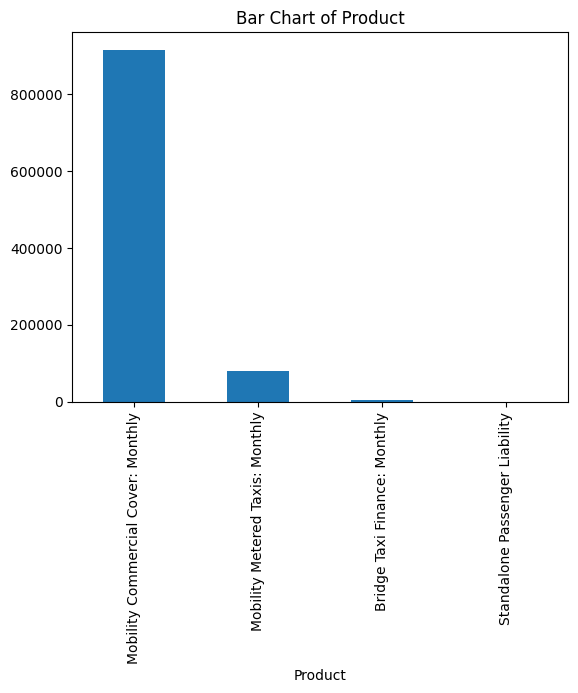

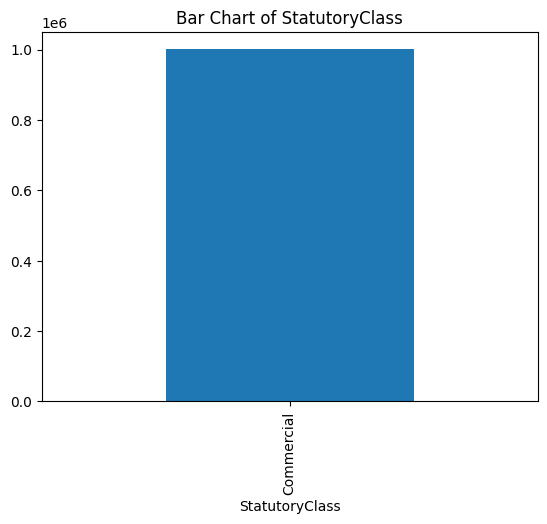

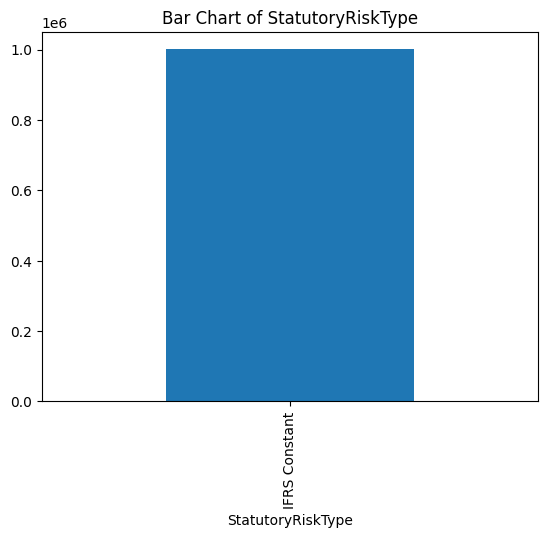

In [18]:
for column in insurance_data.select_dtypes(include='object').columns:
        insurance_data[column].value_counts().plot(kind='bar')
        plt.title(f"Bar Chart of {column}")
        plt.show()


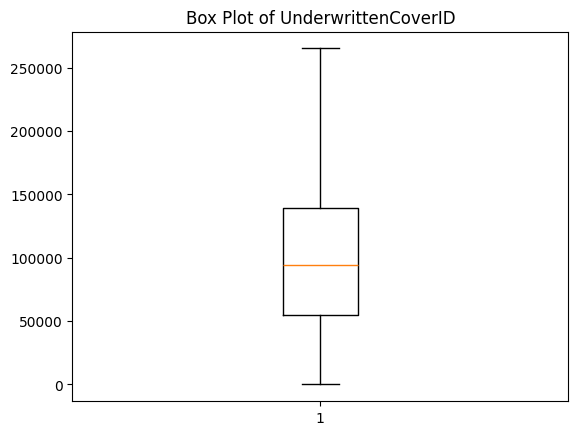

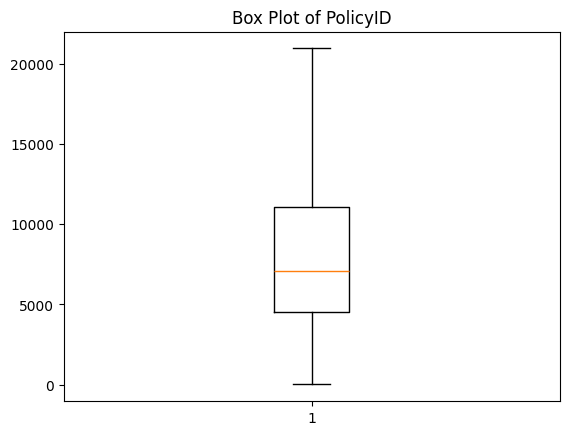

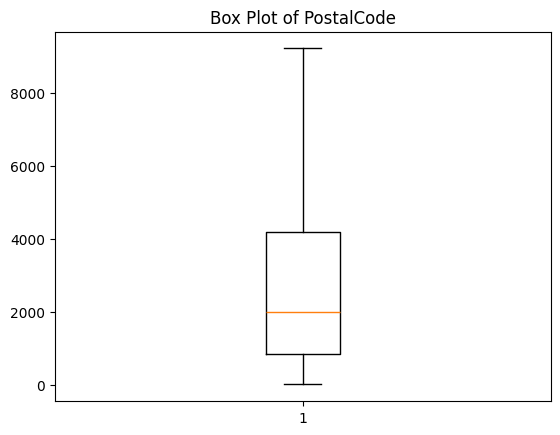

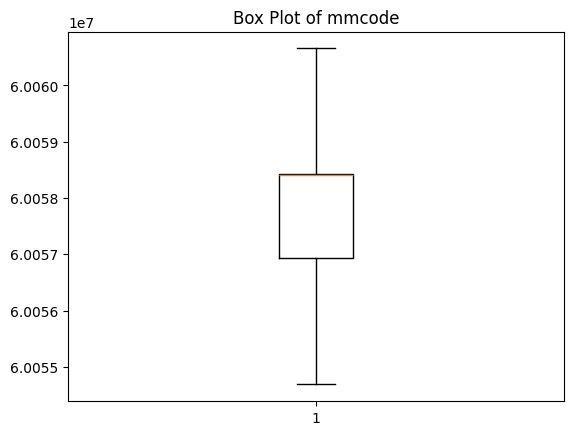

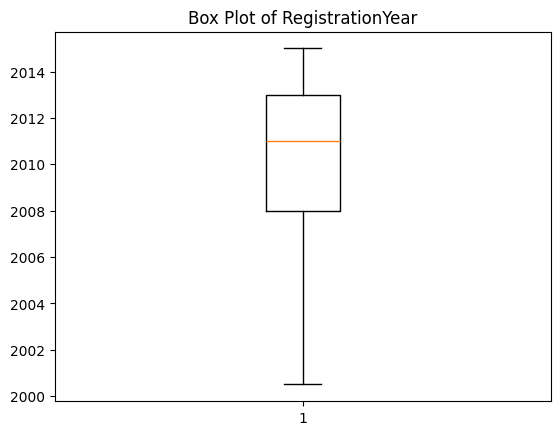

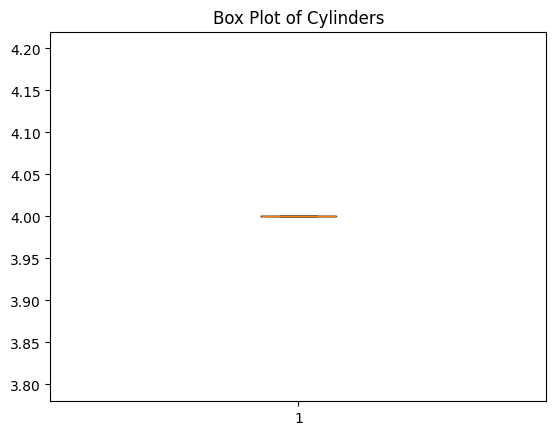

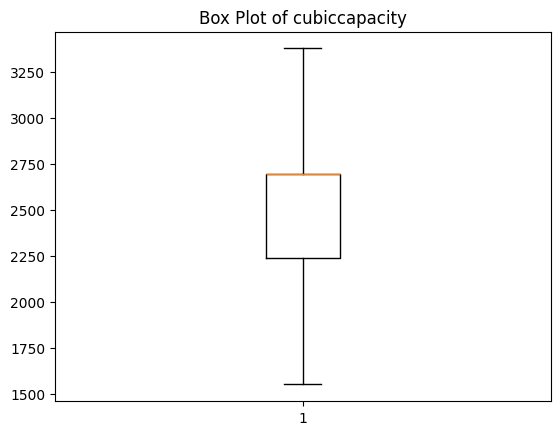

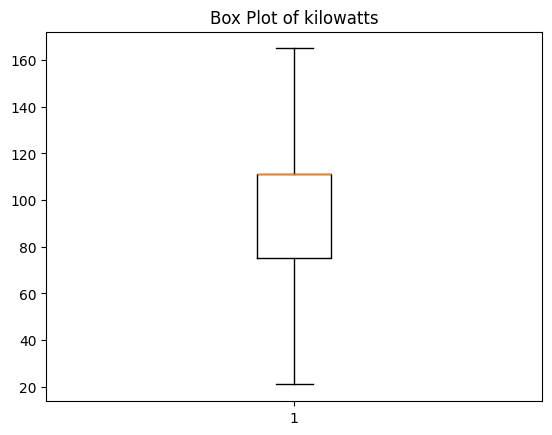

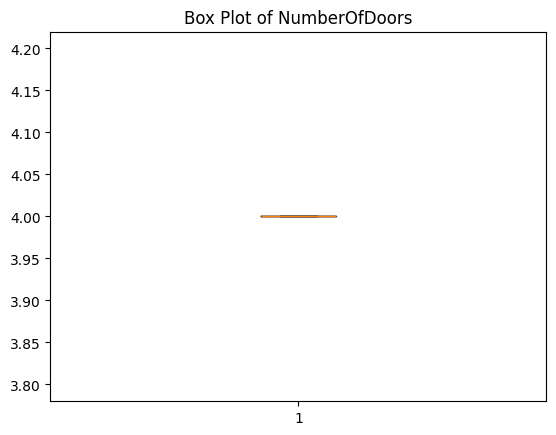

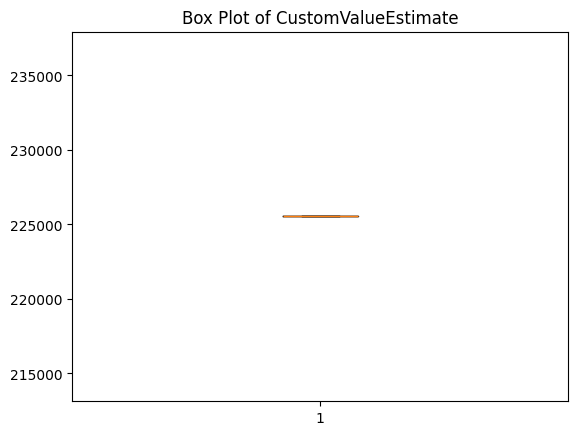

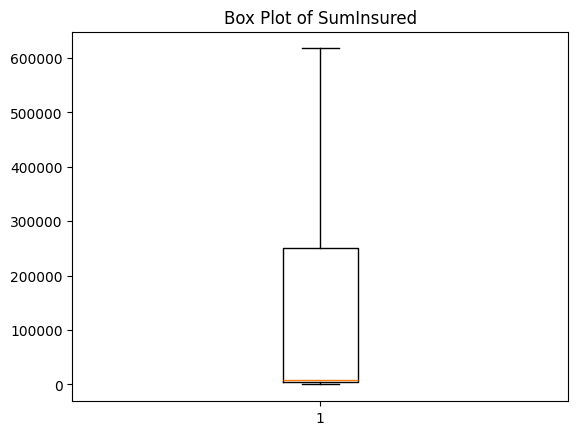

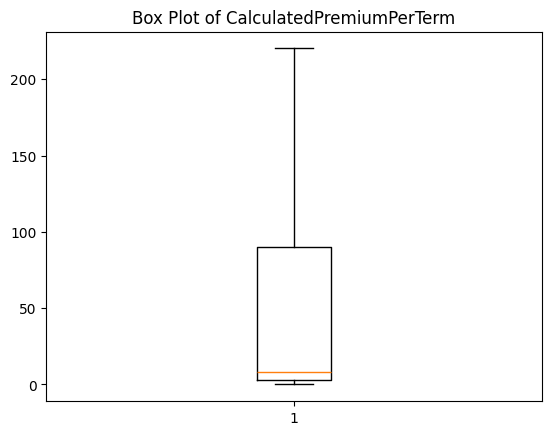

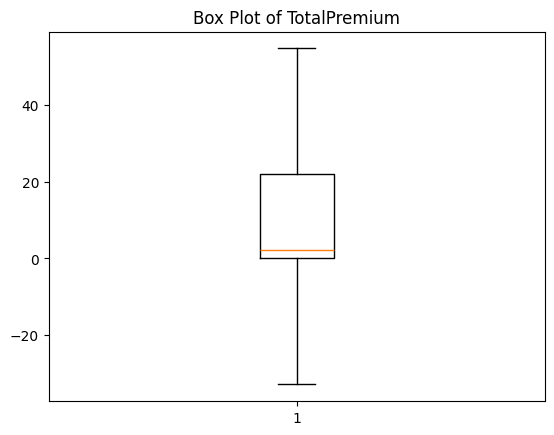

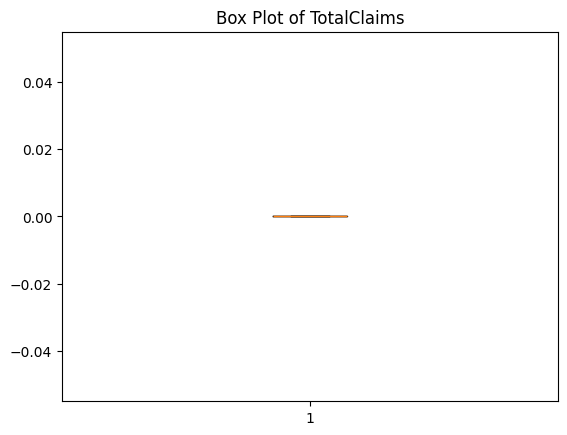

In [19]:
for column in insurance_data.select_dtypes(include='number').columns:
    plt.boxplot(insurance_data[column])
    plt.title(f"Box Plot of {column}")
    plt.show()
